In [1]:
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import pandas as pd
import numpy as np
from scipy.spatial.distance import jensenshannon
from scipy.stats import pearsonr,ttest_ind,mannwhitneyu
from sklearn.metrics import mean_squared_error
rcParams['pdf.fonttype'] = 42


# Import Pacakages

In [19]:
sys.path.append('./')
import Benchmarking.DeconvolutionSpot as DeconvolutionSpot


# Predicting cell type deconvolution

In [8]:
### please add the your SpatialBenchmarking dir into the pythn path 
sys.path.append('./')
import Benchmarking.DeconvolutionSpot as DeconvolutionSpot

### for Cell2location, Stereoscope, Tangram, DestVI, you must have .h5ad files as input.

RNA_h5ad = 'ExampleData/Simulated_STARmap/starmap_sc_rna.h5ad'
Spatial_h5ad = 'ExampleData/Simulated_STARmap/starmap_spatial.h5ad'
celltype_key = 'celltype'
output_path = 'FigureData/Figure4/Dataset10_STARmap/Result_STARmap/'
if not os.path.exists(output_path):
    os.mkdir(output_path)

test = DeconvolutionSpot.Deconvolutions(RNA_h5ad = RNA_h5ad, Spatial_h5ad = Spatial_h5ad, celltype_key = celltype_key, output_path = output_path)
Methods = ['Cell2location', 'Stereoscope','Tangram', 'DestVI']
Result = test.Dencon(Methods)



In [21]:
sys.path.append('./')
import Benchmarking.DeconvolutionSpot as DeconvolutionSpot
### for SpatialDWLS, RCTD, Seurat, SPOTlight, you must have .h5seurat files as input.
### for SpatialDWLS, you must add my_python_path.

RNA_h5Seurat = 'ExampleData/Simulated_STARmap/starmap_sc_rna.h5seurat'
Spatial_h5Seurat = 'ExampleData/Simulated_STARmap/starmap_spatial.h5seurat'
celltype_key = 'celltype'
my_python_path = '/home/qukun/xuhao/miniconda3/envs/cellpymc/bin/python'
#output_path = 'FigureData/Figure4/Dataset10_STARmap/Result_STARmap/'
output_path = '../Try/'
if not os.path.exists(output_path):
    os.mkdir(output_path)

test = DeconvolutionSpot.Deconvolutions(RNA_h5Seurat = RNA_h5Seurat, Spatial_h5Seurat = Spatial_h5Seurat, celltype_key = celltype_key, my_python_path = my_python_path, output_path = output_path)
Methods = ['SpatialDWLS','RCTD', 'Seurat', 'SPOTlight']
Result = test.Dencon(Methods)


We have run RCTD for cell type deconvolution


In [ ]:
sys.path.append('./')
import Benchmarking.DeconvolutionSpot as DeconvolutionSpot

### for STRIDE, have count matrix files as input.

RNA_file = 'ExampleData/Simulated_STARmap/starmap_sc_rna.tsv'
Spatial_file = 'ExampleData/Simulated_STARmap/starmap_spatial.tsv'
celltype_file = 'ExampleData/Simulated_STARmap/starmap_sc_rna_celltype.tsv'
output_path = 'FigureData/Figure4/Dataset10_STARmap/Result_STARmap/'
if not os.path.exists(output_path):
    os.mkdir(output_path)

test = DeconvolutionSpot.Deconvolutions(RNA_file = RNA_file, Spatial_file = Spatial_file, celltype_file = celltype_file, output_path = output_path)
Methods = ['STRIDE']
Result = test.Dencon(Methods)


# SpaOTsc, novoSpaRc, Tangram result

In [3]:
sc_rna_meta = pd.read_csv('ExampleData/Simulated_STARmap/starmap_sc_rna_celltype.tsv', sep = '\t', header = None, index_col = 0)

tangram_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/Tangram_result.txt',index_col=0)
tangram_results = tangram_results.loc[:,np.unique(tangram_results.columns)]

spa_map = np.load('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/SpaOTsc_alignment.npy')
spa_results=pd.DataFrame(np.zeros((spa_map.shape[1],len(np.unique(sc_rna_meta[1])))),columns=np.unique(sc_rna_meta[1]))
spa_pro_results = pd.DataFrame(np.zeros((len(spa_results.index), len(np.unique(spa_results.columns)))),columns=np.unique(spa_results.columns))
for i,l in enumerate(np.argmax(spa_map, axis=1)):
    spa_results.loc[l,sc_rna_meta.iloc[i,0]] += 1

novo_map = np.load('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/novoSpaRc_alignment.npy')
novo_results=pd.DataFrame(np.zeros((novo_map.shape[1],len(np.unique(sc_rna_meta[1])))),columns=np.unique(sc_rna_meta[1]))
novo_pro_results = pd.DataFrame(np.zeros((len(novo_results.index), len(np.unique(novo_results.columns)))),columns=np.unique(novo_results.columns))
for i,l in enumerate(np.argmax(novo_map, axis=1)):
    novo_results.loc[l,sc_rna_meta.iloc[i,0]] += 1



# Cell2location, RCTD, Seurat, Stereoscope, SPOTlight, SpatialDWLS, DestVI, DSTG, STRIDE result

In [4]:
cell2loc_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/Cell2location_result.txt',index_col=0)
cell2loc_results.index = np.arange(len(cell2loc_results))
cell2loc_results.columns = [c.split('q05cell_abundance_w_sf_')[1] for c in cell2loc_results.columns]
cell2loc_results = cell2loc_results.loc[:,np.unique(cell2loc_results.columns)]

RCTD_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/RCTD_result.txt',index_col=0)
RCTD_results.index = np.arange(len(RCTD_results))
RCTD_results = RCTD_results.loc[:,np.unique(RCTD_results.columns)]
RCTD_results.columns = tangram_results.columns

spatialdwls_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/SpatialDWLS_result.txt',index_col=0)
spatialdwls_results.index = np.arange(len(spatialdwls_results))
spatialdwls_results = spatialdwls_results.iloc[:,1:]
spatialdwls_results = spatialdwls_results.loc[:,np.unique(spatialdwls_results.columns)]

stereo_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/Stereoscope_result.txt',index_col=0)
stereo_results.index = np.arange(len(stereo_results))
stereo_results = stereo_results.loc[:,np.unique(stereo_results.columns)]
stereo_results.columns = tangram_results.columns
stereo_results = (stereo_results.T/stereo_results.sum(axis=1)).T
stereo_results = stereo_results.fillna(0)

destvi_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/DestVI_result.txt',index_col=0)
destvi_results.index = np.arange(len(destvi_results))
destvi_results = destvi_results.loc[:,np.unique(destvi_results.columns)]
destvi_results.columns = tangram_results.columns
destvi_results = (destvi_results.T/destvi_results.sum(axis=1)).T
destvi_results = destvi_results.fillna(0)

spotlight_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/SPOTlight_result.txt',index_col=0)
spotlight_results.index = np.arange(len(spotlight_results))
spotlight_results = spotlight_results.loc[:,np.unique(spotlight_results.columns)]
spotlight_results.columns = tangram_results.columns
spotlight_results = (spotlight_results.T/spotlight_results.sum(axis=1)).T
spotlight_results = spotlight_results.fillna(0)

stride_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/STRIDE_result.txt',index_col=0,sep='\t')
stride_results.index = np.arange(len(stride_results))
stride_results = stride_results.loc[:,np.unique(stride_results.columns)]
stride_results.columns = tangram_results.columns
stride_results = (stride_results.T/stride_results.sum(axis=1)).T
stride_results = stride_results.fillna(0)

seurat_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/Seurat_result.txt',index_col=0)
seurat_results = seurat_results.iloc[:,1:-1]
seurat_results = seurat_results.loc[:,np.unique(seurat_results.columns)]
seurat_results.columns = tangram_results.columns

def get_dstg_results(results_path,celltype=None):
    results = pd.read_csv(results_path + '/DSTG_result.txt',sep=',',header=None)
    label = pd.read_csv(results_path + '/Label.csv',sep=',')
    results.columns = label.columns
    if celltype is not None:
        results.loc[:,np.setdiff1d(celltype,results.columns)] = 0
    results = results.loc[:,np.unique(results.columns)]
    return results
dstg_results = get_dstg_results('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/')
dstg_results.columns = tangram_results.columns


In [5]:
tangram_results = (tangram_results.T/tangram_results.sum(axis=1)).T
seurat_results = (seurat_results.T/seurat_results.sum(axis=1)).T
cell2loc_results = (cell2loc_results.T/cell2loc_results.sum(axis=1)).T
novo_results = (novo_results.T/novo_results.sum(axis=1)).T
spa_results = (spa_results.T/spa_results.sum(axis=1)).T

tangram_results = tangram_results.fillna(0)
seurat_results = seurat_results.fillna(0)
cell2loc_results = cell2loc_results.fillna(0)
novo_results = novo_results.fillna(0)
spa_results = spa_results.fillna(0)

tangram_results = tangram_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
seurat_results = seurat_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
RCTD_results = RCTD_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
cell2loc_results = cell2loc_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
stereo_results = stereo_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
destvi_results = destvi_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
spotlight_results = spotlight_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
spatialdwls_results = spatialdwls_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
dstg_results = dstg_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
stride_results = stride_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
novo_results = novo_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
spa_results = spa_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])

gd_results = pd.read_table('FigureData/Figure4/Dataset10_STARmap/Simulated_STARmap/combined_spot_clusters.txt', sep = '\t', header = 0, index_col = 0)
gd_results.columns = ['Astro', 'Endo', 'Excitatory L2/3', 'Excitatory L4', 'Excitatory L5', 'Excitatory L6', 'HPC', 'Micro', 'Npy'
                     , 'Olig', 'Other', 'Inhibitory Pvalb', 'Smc', 'Inhibitory Sst', 'Inhibitory Vip']
gd_results = (gd_results.T/gd_results.sum(axis=1)).T

gd_results = gd_results.drop(columns=['Other','Npy', 'HPC'])
gd_results = gd_results.loc[:,np.unique(gd_results.columns)]

gd_results = gd_results.fillna(0)

gd_loc = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Simulated_STARmap/combined_Locations.txt',sep='\t')



# Plot celltype distribution

In [6]:
def plot_starmap_celltype(celltype=None,celltype_ind=None,save=None,return_fig=False):
    if celltype is not None:
        celltype_ind = np.where(celltype == tangram_results.columns)[0]
    elif celltype_ind is not None:
        celltype = tangram_results.columns[celltype_ind]
    else:
        raise Error('error')
    print(celltype)
    c_ind = celltype_ind
    fig,axes = plt.subplots(ncols=13,nrows=1,figsize=(62,8.0))
    # fig.tight_layout()
    axes[0].scatter(x=gd_loc['x'],y=gd_loc['y'],c=gd_results.iloc[:,c_ind],s=500,marker='s')
    axes[0].scatter(x=5,y=18,c=0,s=500,marker='s')
    axes[0].set_xlim(-0.5,9.5)
    axes[0].set_ylim(-0.5,18.5)
    axes[0].axis('off')
    axes[0].set_title('Ground Truth')

    axes[1].scatter(x=gd_loc['x'],y=gd_loc['y'],c=cell2loc_results.iloc[:,c_ind],s=500,marker='s')
    axes[1].scatter(x=5,y=18,c=0,s=500,marker='s',)
    axes[1].set_xlim(-0.5,9.5)
    axes[1].set_ylim(-0.5,18.5)
    axes[1].axis('off')
    axes[1].set_title('Cell2location')

    axes[2].scatter(x=gd_loc['x'],y=gd_loc['y'],c=spatialdwls_results.iloc[:,c_ind],s=500,marker='s')
    axes[2].scatter(x=5,y=18,c=0,s=500,marker='s',)
    axes[2].set_xlim(-0.5,9.5)
    axes[2].set_ylim(-0.5,18.5)
    axes[2].axis('off')
    axes[2].set_title('SpatialDWLS')

    axes[3].scatter(x=gd_loc['x'],y=gd_loc['y'],c=RCTD_results.iloc[:,c_ind],s=500,marker='s')
    axes[3].scatter(x=5,y=18,c=0,s=500,marker='s',)
    axes[3].set_xlim(-0.5,9.5)
    axes[3].set_ylim(-0.5,18.5)
    axes[3].axis('off')
    axes[3].set_title('RCTD')

    axes[4].scatter(x=gd_loc['x'],y=gd_loc['y'],c=stride_results.iloc[:,c_ind],s=500,marker='s')
    axes[4].scatter(x=5,y=18,c=0,s=500,marker='s',)
    axes[4].set_xlim(-0.5,9.5)
    axes[4].set_ylim(-0.5,18.5)
    axes[4].axis('off')
    axes[4].set_title('STRIDE')

    axes[5].scatter(x=gd_loc['x'],y=gd_loc['y'],c=stereo_results.iloc[:,c_ind],s=500,marker='s')
    axes[5].scatter(x=5,y=18,c=0,s=500,marker='s',)
    axes[5].set_xlim(-0.5,9.5)
    axes[5].set_ylim(-0.5,18.5)
    axes[5].axis('off')
    axes[5].set_title('Stereoscope')

    axes[6].scatter(x=gd_loc['x'],y=gd_loc['y'],c=tangram_results.iloc[:,c_ind],s=500,marker='s')
    axes[6].scatter(x=5,y=18,c=0,s=500,marker='s',)
    axes[6].set_xlim(-0.5,9.5)
    axes[6].set_ylim(-0.5,18.5)
    axes[6].axis('off')
    axes[6].set_title('Tangram')

    axes[7].scatter(x=gd_loc['x'],y=gd_loc['y'],c=destvi_results.iloc[:,c_ind],s=500,marker='s')
    axes[7].scatter(x=5,y=18,c=0,s=500,marker='s',)
    axes[7].set_xlim(-0.5,9.5)
    axes[7].set_ylim(-0.5,18.5)
    axes[7].axis('off')
    axes[7].set_title('DestVI')

    axes[8].scatter(x=gd_loc['x'],y=gd_loc['y'],c=seurat_results.iloc[:,c_ind],s=500,marker='s')
    axes[8].scatter(x=5,y=18,c=0,s=500,marker='s',)
    axes[8].set_xlim(-0.5,9.5)
    axes[8].set_ylim(-0.5,18.5)
    axes[8].axis('off')
    axes[8].set_title('Seurat')

    axes[9].scatter(x=gd_loc['x'],y=gd_loc['y'],c=spotlight_results.iloc[:,c_ind],s=500,marker='s')
    axes[9].scatter(x=5,y=18,c=0,s=500,marker='s',)
    axes[9].set_xlim(-0.5,9.5)
    axes[9].set_ylim(-0.5,18.5)
    axes[9].axis('off')
    axes[9].set_title('SPOTlight')
    
    axes[10].scatter(x=gd_loc['x'],y=gd_loc['y'],c=dstg_results.iloc[:,c_ind],s=500,marker='s')
    axes[10].scatter(x=5,y=18,c=0,s=500,marker='s',)
    axes[10].set_xlim(-0.5,9.5)
    axes[10].set_ylim(-0.5,18.5)
    axes[10].axis('off')
    axes[10].set_title('DSTG')
    
    axes[11].scatter(x=gd_loc['x'],y=gd_loc['y'],c=spa_results.iloc[:,c_ind],s=500,marker='s')
    axes[11].scatter(x=5,y=18,c=0,s=500,marker='s',)
    axes[11].set_xlim(-0.5,9.5)
    axes[11].set_ylim(-0.5,18.5)
    axes[11].axis('off')
    axes[11].set_title('SpaOTsc')
    
    axes[12].scatter(x=gd_loc['x'],y=gd_loc['y'],c=novo_results.iloc[:,c_ind],s=500,marker='s')
    axes[12].scatter(x=5,y=18,c=0,s=500,marker='s',)
    axes[12].set_xlim(-0.5,9.5)
    axes[12].set_ylim(-0.5,18.5)
    axes[12].axis('off')
    axes[12].set_title('novoSpaRc')
    if save is not None:
        plt.savefig(save,bbox_inches='tight',dpi=300)
    if not return_fig:
        plt.show()
    else:
        plt.close()
        return fig

Excitatory L2/3


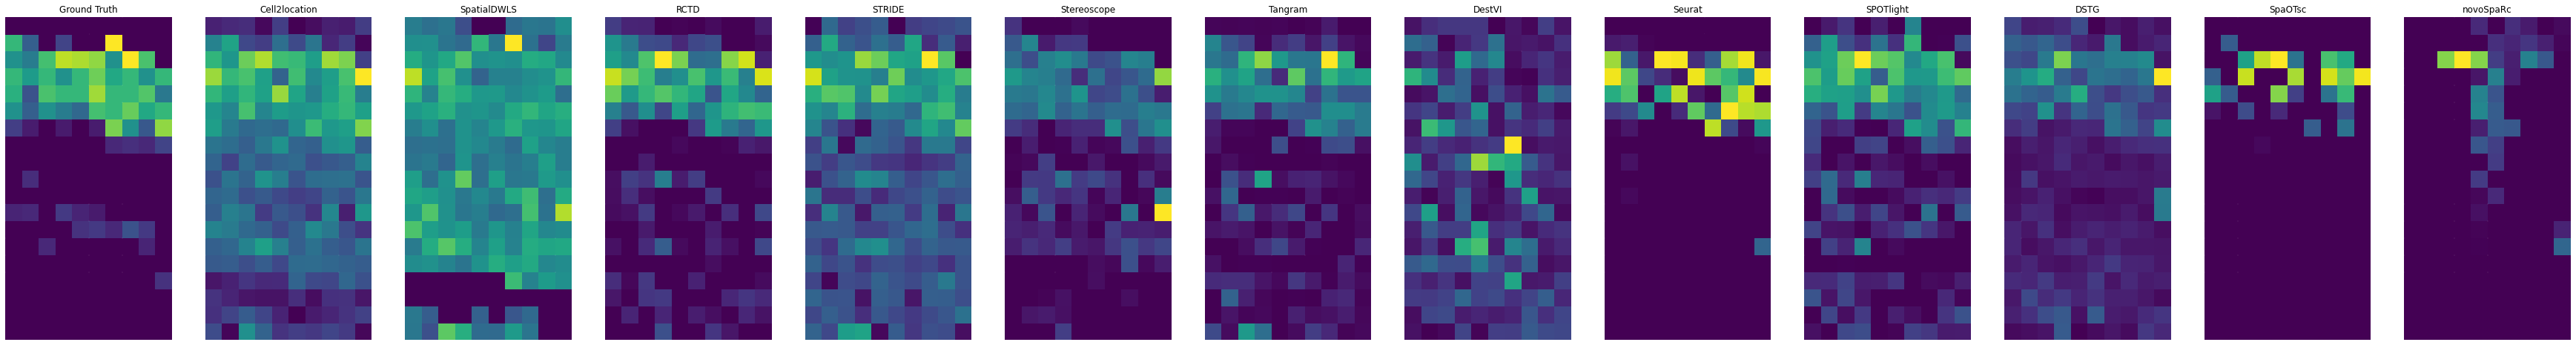

Excitatory L4


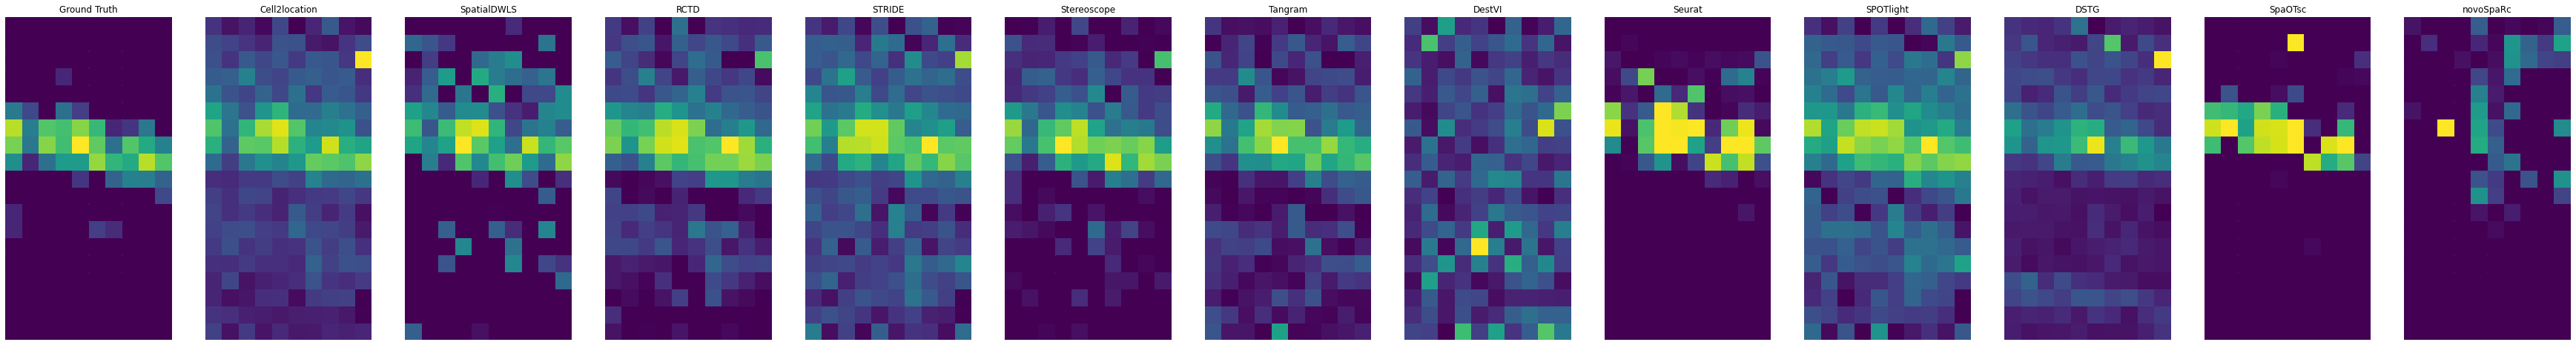

Excitatory L5


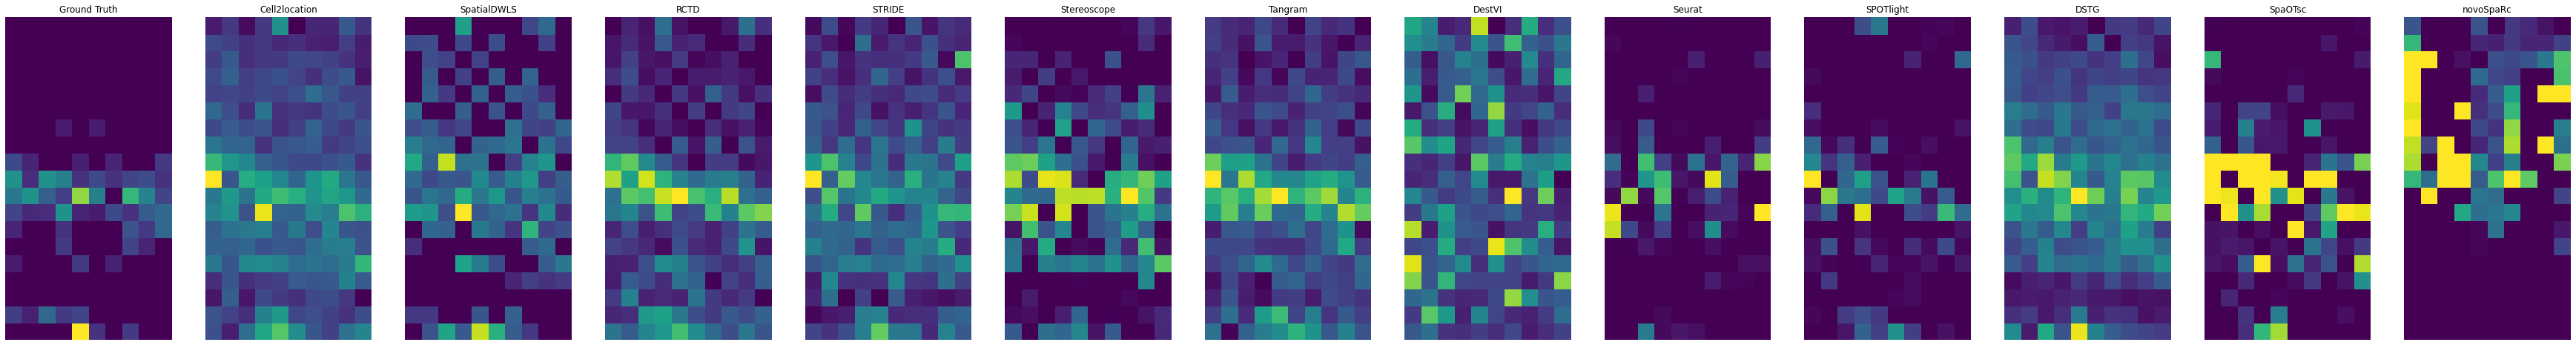

Excitatory L6


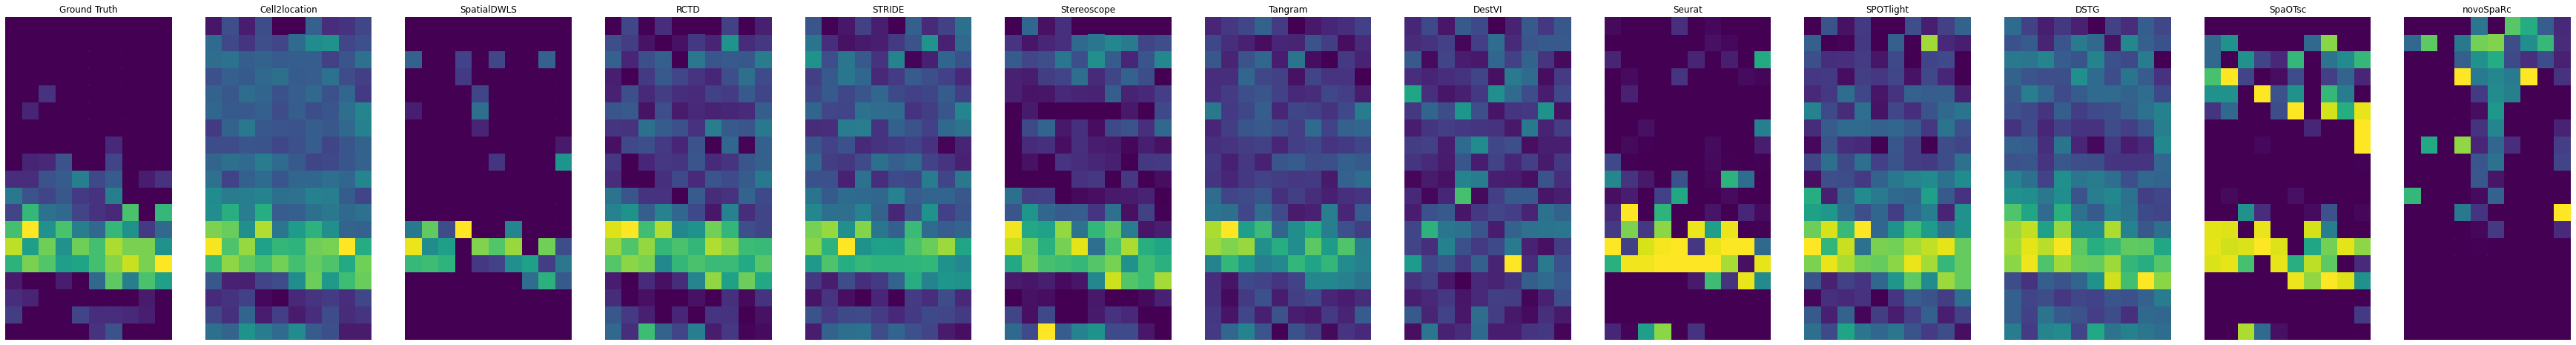

In [7]:
plot_starmap_celltype(celltype_ind=2,save=os.path.join('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/','starmap_Excitatory_L2_3.pdf'))
plot_starmap_celltype(celltype_ind=3,save=os.path.join('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/','starmap_Excitatory_L4.pdf'))
plot_starmap_celltype(celltype_ind=4,save=os.path.join('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/','starmap_Excitatory_L5.pdf'))
plot_starmap_celltype(celltype_ind=5,save=os.path.join('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/','starmap_Excitatory_L6.pdf'))


In [8]:
def ssim(im1,im2,M=1):
    im1, im2 = im1/im1.max(), im2/im2.max()
    mu1 = im1.mean()
    mu2 = im2.mean()
    sigma1 = np.sqrt(((im1 - mu1) ** 2).mean())
    sigma2 = np.sqrt(((im2 - mu2) ** 2).mean())
    sigma12 = ((im1 - mu1) * (im2 - mu2)).mean()
    k1, k2, L = 0.01, 0.03, M
    C1 = (k1*L) ** 2
    C2 = (k2*L) ** 2
    C3 = C2/2
    l12 = (2*mu1*mu2 + C1)/(mu1 ** 2 + mu2 ** 2 + C1)
    c12 = (2*sigma1*sigma2 + C2)/(sigma1 ** 2 + sigma2 ** 2 + C2)
    s12 = (sigma12 + C3)/(sigma1*sigma2 + C3)
    ssim = l12 * c12 * s12
    return ssim

def rmse(x1,x2):
    return mean_squared_error(x1,x2,squared=False)
def mae(x1,x2):
    return np.mean(np.abs(x1-x2))

from collections.abc import Iterable
def compare_results(gd,result_list,metric='pcc',columns=None,axis=1):
    if metric=='pcc':
        func = pearsonr
        r_ind = 0
    if metric=='mae':
        func = mae
        r_ind = None
    if metric=='jsd':
        func = jensenshannon
        r_ind = None
    if metric=='rmse':
        func = rmse
        r_ind = None
    if metric=='ssim':
        func = ssim
        r_ind = None
    if isinstance(result_list, pd.DataFrame):
        c_list = []
        if axis == 1:
            print('axis: ',1)
            for i,c in enumerate(gd.columns):
                r = func(gd.iloc[:,i].values, np.clip(result_list.iloc[:,i],0,1))
                if isinstance(result_list, Iterable):
                    if r_ind is not None:
                        r = r[r_ind]
                c_list.append(r)
        else:
            print('axis: ',0)
            for i,c in enumerate(gd.index):
                r = func(gd.iloc[i,:].values, np.clip(result_list.iloc[i,:],0,1))
                if isinstance(result_list, Iterable):
                    if r_ind is not None:
                        r = r[r_ind]
                c_list.append(r)
        df = pd.DataFrame(c_list,index=gd.columns,columns=columns)
    else:
        df_list = []
        for res in result_list:
            c_list = []
            if axis == 1:
                for i,c in enumerate(gd.columns):
                    r = func(gd.iloc[:,i].values, np.clip(res.iloc[:,i],0,1))
                    if isinstance(res, Iterable):
                        if r_ind is not None:
                            r = r[r_ind]
                    c_list.append(r)
                df_tmp = pd.DataFrame(c_list,index=gd.columns)
            else:
                for i,c in enumerate(gd.index):
                    r = func(gd.iloc[i,:].values, np.clip(res.iloc[i,:],0,1))
                    if isinstance(res, Iterable):
                        if r_ind is not None:
                            r = r[r_ind]
                    c_list.append(r)
                df_tmp = pd.DataFrame(c_list,index=gd.index)
            df_list.append(df_tmp)
        df = pd.concat(df_list,axis=1)
        df.columns = columns
    return df


In [9]:
starmap_spots_pcc = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc'],
    axis=0,
    metric='pcc'
)
starmap_clusters_pcc = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc'],
    axis=1,
    metric='pcc'
)
starmap_spots_ssim = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc'],
    axis=0,
    metric='ssim'
)
starmap_clusters_ssim = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc'],
    axis=1,
    metric='ssim'
)
starmap_spots_rmse = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc'],
    axis=0,
    metric='rmse'
)
starmap_clusters_rmse = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc'],
    axis=1,
    metric='rmse'
)
starmap_spots_jsd = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc'],
    axis=0,
    metric='jsd'
)
starmap_clusters_jsd = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc'],
    axis=1,
    metric='jsd'
)



/home/qukun/wen2017/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/qukun/wen2017/miniconda2/envs/Py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/qukun/wen2017/.local/lib/python3.6/site-packages/scipy/spatial/distance.py:1279: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)
/home/qukun/wen2017/.local/lib/python3.6/site-packages/scipy/spatial/distance.py:1280: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)


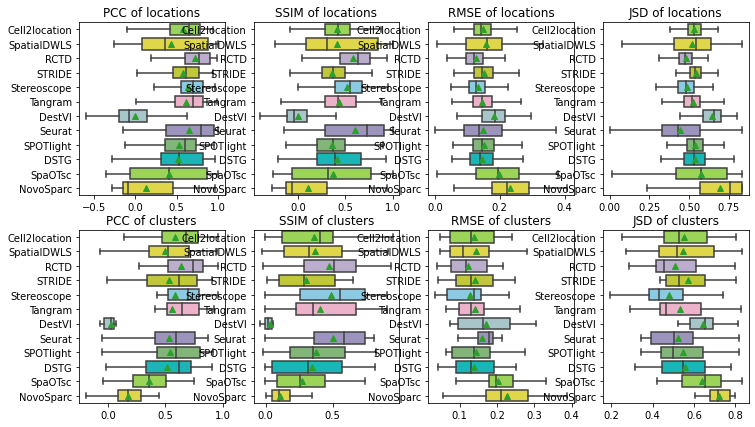

In [10]:
fig,axes = plt.subplots(ncols=4,nrows=2,figsize=(12,7))
order = ['Cell2location','SpatialDWLS','RCTD','STRIDE','Stereoscope','Tangram','DestVI', 'Seurat', 'SPOTlight','DSTG','SpaOTsc','NovoSparc']
colors = ["#9de846", '#F9EC31', "#BBA8D1","#D6DE23", "#7BD1F1", "#F5A8C7",  "#A2CBCF", "#988DC3", "#79c06e",'#00CED1']
sns.boxplot(data=starmap_spots_pcc,order=order,palette=colors,ax=axes[0,0],orient='h', showfliers = False,showmeans=True)
axes[0,0].set_title('PCC of locations')
sns.boxplot(data=starmap_spots_ssim,order=order,palette=colors,ax=axes[0,1],orient='h', showfliers = False,showmeans=True)
axes[0,1].set_title('SSIM of locations')
sns.boxplot(data=starmap_spots_rmse,order=order,palette=colors,ax=axes[0,2],orient='h', showfliers = False,showmeans=True)
axes[0,2].set_title('RMSE of locations')
sns.boxplot(data=starmap_spots_jsd,order=order,palette=colors,ax=axes[0,3],orient='h', showfliers = False,showmeans=True)
axes[0,3].set_title('JSD of locations')

sns.boxplot(data=starmap_clusters_pcc,order=order,palette=colors,ax=axes[1,0],orient='h', showfliers = False,showmeans=True)
axes[1,0].set_title('PCC of clusters')
sns.boxplot(data=starmap_clusters_ssim,order=order,palette=colors,ax=axes[1,1],orient='h', showfliers = False,showmeans=True)
axes[1,1].set_title('SSIM of clusters')
sns.boxplot(data=starmap_clusters_rmse,order=order,palette=colors,ax=axes[1,2],orient='h', showfliers = False,showmeans=True)
axes[1,2].set_title('RMSE of clusters')
sns.boxplot(data=starmap_clusters_jsd,order=order,palette=colors,ax=axes[1,3],orient='h', showfliers = False,showmeans=True)
axes[1,3].set_title('JSD of clusters')
plt.savefig(os.path.join('FigureData/Figure4/Dataset10_STARmap/Result_STARmap','starmap_all_metrics.pdf'),dpi=300,bbox_inches='tight')
plt.show()
# plt.close()